In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *

import pandas as pd
import pysgpp as sg

from fractions import Fraction

In [2]:
def get_grid_points(grid, d3=False):
    storage = grid.getStorage()
    indices = []
    for i in range(0, grid.getSize()):
        index = storage.get(i)
        x_pos = index.getCoord(0)
        y_pos = index.getCoord(1)
        if d3:
            z_pos = index.getCoord(2)
        level_sum = index.getLevelSum()
        dim = index.getDimension()
        prior = 0.25**(level_sum-dim)
        if d3:
            indices.append( (x_pos,y_pos, z_pos, prior) )
        else:
            indices.append( (x_pos,y_pos, prior) )
    return indices

# Diagonal Grid
1. Create grid.
2. Find bias for each grid point.
3. Plot grid, with each bias in dif. col.

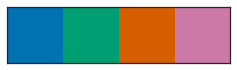

In [7]:
c = sns.color_palette("colorblind", 4)
sns.palplot(c)

In [8]:
def plot_diagonal(level, T):
    grid = sg.Grid.createModLinearGrid(2)
    gen = grid.getGenerator()
    gen.regular(level,T)
    indices = get_grid_points(grid)
    df = pd.DataFrame(indices, columns=['x', 'y', 'prior'])
    size = figsize(1)
    fig, ax = plt.subplots(figsize=(size[0], size[0]))
    #ax.set_title("{} gridpoints for level = {} with T = {}".format(size, level, T))
    ax.set_axis_off()
    ax.set(adjustable='box-forced', aspect='equal')
    for i, (name, group) in enumerate(df.groupby('prior')):
        sns.set_palette(sns.color_palette('Greens'))
        ax.plot(group['x'], group['y'], label=Fraction(name), linewidth=0, marker='$ {} $'.format(Fraction(name)),
            markersize=18, c=c[i])
    return fig, ax

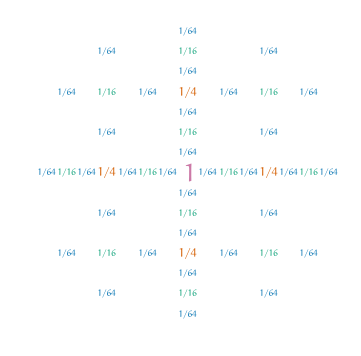

In [25]:
fig, ax = plot_diagonal(4, 0)
fig.savefig("../writing/thesis/figures/diagonal.svg", bbox='tight')

# Adaptivity
1. Create grid.
2. Save list of grid points.
3. Adapt step.
4. Save list of grid points, maybe go to 3.
5. Plot grid, new points in diff. col


In [6]:
def get_random_weights(grid):
    np.random.seed(42)
    weights = np.random.random(grid.getSize())
    return sg.DataVector(weights)

def list_diff(a, b):
        b = set(b)
        return [i for i in a if i not in b]

In [110]:
def plot_refinement(level, num_points):
    grid = sg.Grid.createModLinearGrid(2)
    gen = grid.getGenerator()
    gen.regular(level)
    weights = get_random_weights(grid)

    grid_0 = get_grid_points(grid)

    adapt = sg.SurplusRefinementFunctor(weights, refinements_num=num_points)
    gen.refine(adapt)
    grid_1 = get_grid_points(grid)

    gen.refine(adapt)
    grid_2 = get_grid_points(grid)

    size = figsize(scale=0.8)
    fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(size[0]*3, size[0]))
    for ax in axs:
        ax.set_axis_off()
        ax.set(adjustable='box-forced', aspect='equal')

    args = {'marker': 'o',
            's': 60,
            'edgecolor': 'black',
            'linewidth': '0'}    
        
    x, y, _ = zip(*grid_0)
    axs[0].scatter(x, y, c='grey', **(args))
    axs[1].scatter(x, y, c='grey', **args)
    axs[2].scatter(x, y, c='grey', **args)


    x, y, _ = zip(*list_diff(grid_1, grid_0))
    axs[1].scatter(x, y, c='red', **args)
    axs[2].scatter(x, y, c='grey', **args)

    x, y, _ = zip(*list_diff(grid_2, grid_1))
    axs[2].scatter(x, y, c='red', **args)
    return fig, axs

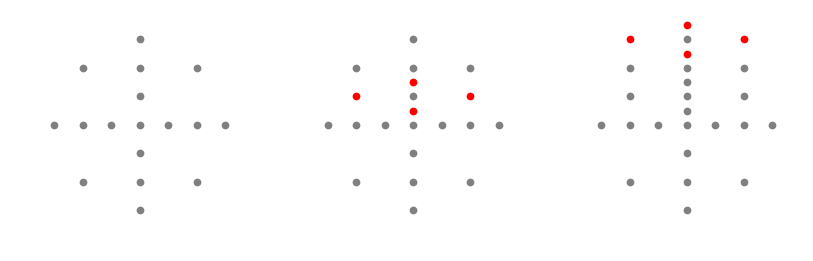

In [111]:
fig, ax = plot_refinement(3, 1)
fig.savefig("../writing/thesis/figures/adaptivity.pdf", bbox_inches='tight')

In [12]:
def plot_generalized(level, T, ax):
    ax.set_axis_off()
    ax.set(adjustable='box-forced', aspect='equal')
    grid = sg.Grid.createModLinearGrid(2)
    gen = grid.getGenerator()
    gen.regular(level, T)
    points = get_grid_points(grid)
    x, y, _ = zip(*points)
    ax.scatter(x,y, s=60, c='black')
    ax.set(adjustable='box-forced', aspect='equal')
    return fig, ax

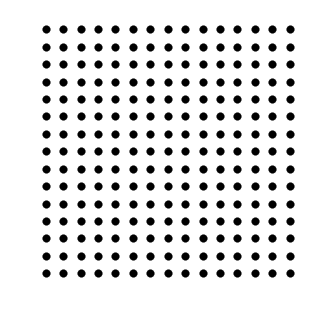

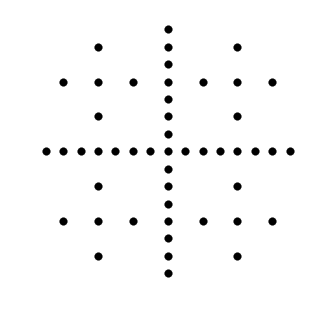

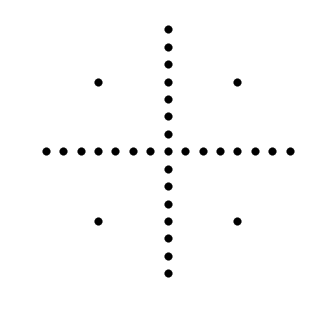

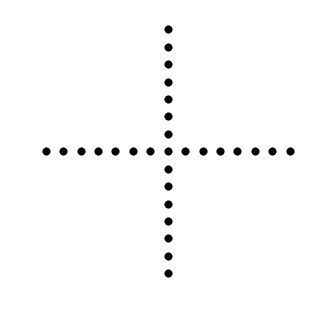

In [35]:
for T in [float('-inf'), 0, 0.5, 1.0]:
    fig, ax = plt.subplots(figsize=(5,10))
    plot_generalized(4, T, ax)
    fig.savefig("../writing/thesis/figures/grid_T{}.pdf".format(T), bbox='tight', bbox_inches='tight')

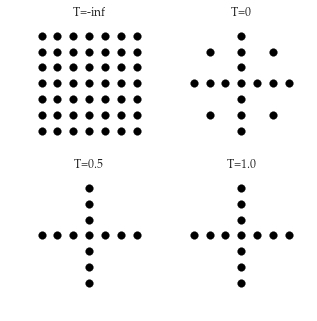

In [32]:
fig, ax = plt.subplots(figsize=(5,5), ncols=2, nrows=2)
for i,T in enumerate([float('-inf'), 0, 0.5, 1.0]):
    plot_generalized(3, T, ax[i/2][i%2])
    ax[i/2][i%2].set_title("T={}".format(T))
    fig.savefig("../writing/thesis/figures/generalisedGrid.svg".format(T), bbox='tight', bbox_inches='tight')

In [39]:
points

[(0.5, 0.5, 1.0),
 (0.25, 0.5, 0.25),
 (0.75, 0.5, 0.25),
 (0.125, 0.5, 0.0625),
 (0.375, 0.5, 0.0625),
 (0.625, 0.5, 0.0625),
 (0.875, 0.5, 0.0625),
 (0.5, 0.25, 0.25),
 (0.5, 0.75, 0.25),
 (0.5, 0.125, 0.0625),
 (0.5, 0.375, 0.0625),
 (0.5, 0.625, 0.0625),
 (0.5, 0.875, 0.0625),
 (0.25, 0.25, 0.0625),
 (0.25, 0.75, 0.0625),
 (0.25, 0.125, 0.015625),
 (0.25, 0.375, 0.015625),
 (0.25, 0.625, 0.015625),
 (0.25, 0.875, 0.015625),
 (0.75, 0.25, 0.0625),
 (0.75, 0.75, 0.0625),
 (0.75, 0.125, 0.015625),
 (0.75, 0.375, 0.015625),
 (0.75, 0.625, 0.015625),
 (0.75, 0.875, 0.015625),
 (0.125, 0.25, 0.015625),
 (0.125, 0.75, 0.015625),
 (0.125, 0.125, 0.00390625),
 (0.125, 0.375, 0.00390625),
 (0.125, 0.625, 0.00390625),
 (0.125, 0.875, 0.00390625),
 (0.375, 0.25, 0.015625),
 (0.375, 0.75, 0.015625),
 (0.375, 0.125, 0.00390625),
 (0.375, 0.375, 0.00390625),
 (0.375, 0.625, 0.00390625),
 (0.375, 0.875, 0.00390625),
 (0.625, 0.25, 0.015625),
 (0.625, 0.75, 0.015625),
 (0.625, 0.125, 0.00390625),
 

In [36]:
z

(1.0,
 0.25,
 0.25,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.25,
 0.25,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.0625,
 0.0625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.25,
 0.25,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.0625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.0625,
 0.0625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.015625,
 0.015625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.00390625,
 0.0

In [37]:
y

(0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.25,
 0.75,
 0.125,
 0.375,
 0.625,
 0.875,
 0.25,
 0.75,
 0.125,
 0.375,
 0.625,
 0.875,
 0.25,
 0.75,
 0.125,
 0.375,
 0.625,
 0.875,
 0.25,
 0.75,
 0.125,
 0.375,
 0.625,
 0.875,
 0.25,
 0.75,
 0.125,
 0.375,
 0.625,
 0.875,
 0.25,
 0.75,
 0.125,
 0.375,
 0.625,
 0.875,
 0.25,
 0.75,
 0.125,
 0.375,
 0.625,
 0.875,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.125,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.375,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.625,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.875,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.25,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.125,
 0.125,
 0.125,
